In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\DATA SCIENCE\GITHUB REPO\Data\Social_Media_Engagement.csv")

In [3]:
df.head()

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account ID       10000 non-null  int64  
 1   Username         10000 non-null  object 
 2   Platform         10000 non-null  object 
 3   Follower Count   10000 non-null  int64  
 4   Posts Per Week   10000 non-null  int64  
 5   Engagement Rate  10000 non-null  float64
 6   Ad Spend (USD)   10000 non-null  float64
 7   Conversion Rate  10000 non-null  float64
 8   Campaign Reach   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [5]:
df.describe()

,Account ID,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,503941.555000,3.976900,0.086736,527.741840,0.029229,25308.848300
std,2886.89568,286028.799845,1.974274,0.013327,280.086676,0.011438,14119.006672
min,1.00000,1449.000000,1.000000,0.064200,51.950000,0.010100,1005.000000
25%,2500.75000,257061.750000,2.000000,0.083400,277.400000,0.019300,13187.000000
50%,5000.50000,506529.000000,4.000000,0.085600,517.560000,0.028400,25260.000000
75%,7500.25000,749949.250000,6.000000,0.098600,783.600000,0.039200,37524.000000
max,10000.00000,999982.000000,7.000000,0.102000,998.200000,0.050000,49998.000000


In [6]:
df.isnull().sum()

Account ID         0
Username           0
Platform           0
Follower Count     0
Posts Per Week     0
Engagement Rate    0
Ad Spend (USD)     0
Conversion Rate    0
Campaign Reach     0
dtype: int64

In [7]:
# Dropping Unnecessary Columns And Vis

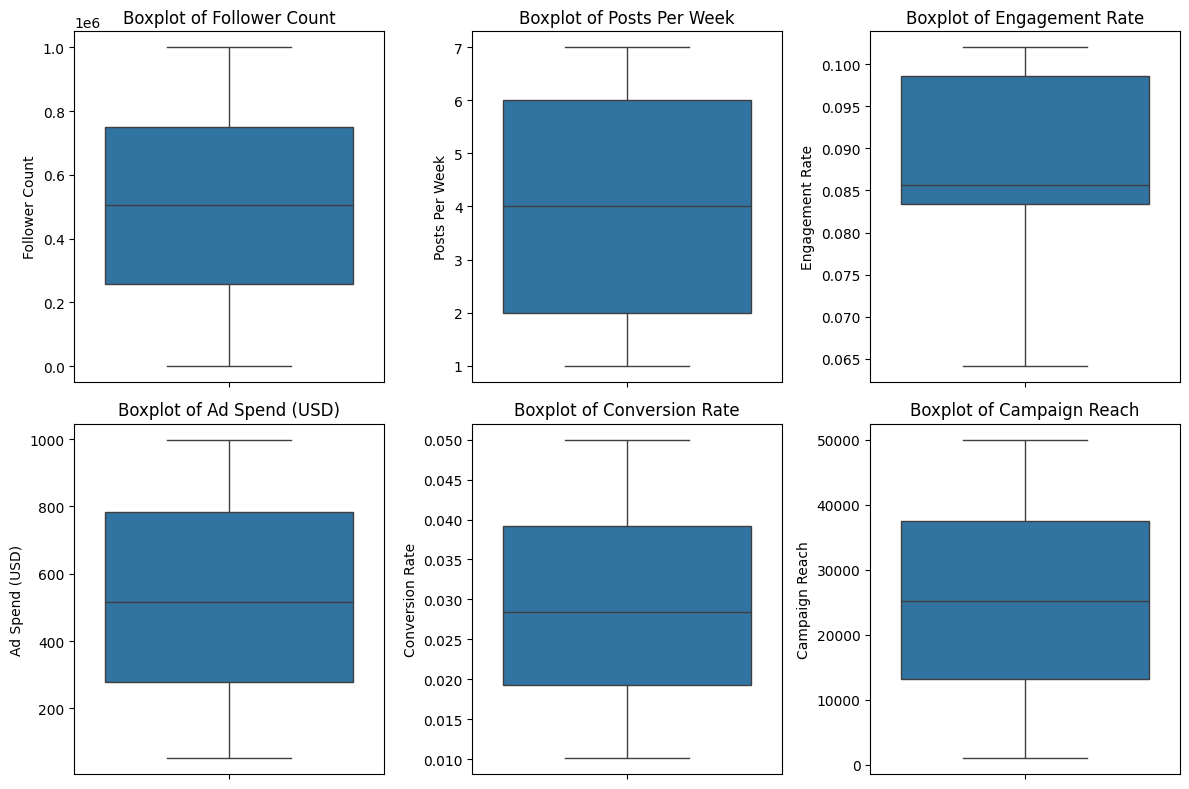

In [8]:
df.drop(columns=['Account ID' , 'Username'], inplace=True)

num_col = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_col = df.select_dtypes(include=["object"]).columns.tolist()

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [9]:
df.sample(5)

,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
2252,TikTok,568750,1,0.0642,893.81,0.0398,3225
5431,TikTok,238565,1,0.0642,916.10,0.0261,17743
3121,Twitter,340133,7,0.1020,431.53,0.0269,26846
7870,LinkedIn,606792,1,0.0642,154.35,0.0225,29940
9241,TikTok,55370,2,0.0856,446.68,0.0353,19602


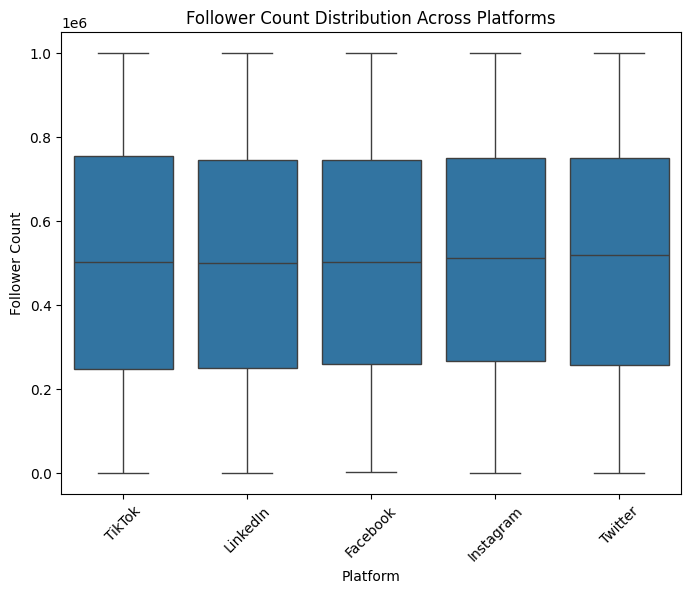

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Platform'], y=df['Follower Count'])
plt.title('Follower Count Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Follower Count')
plt.xticks(rotation=45)
plt.show()

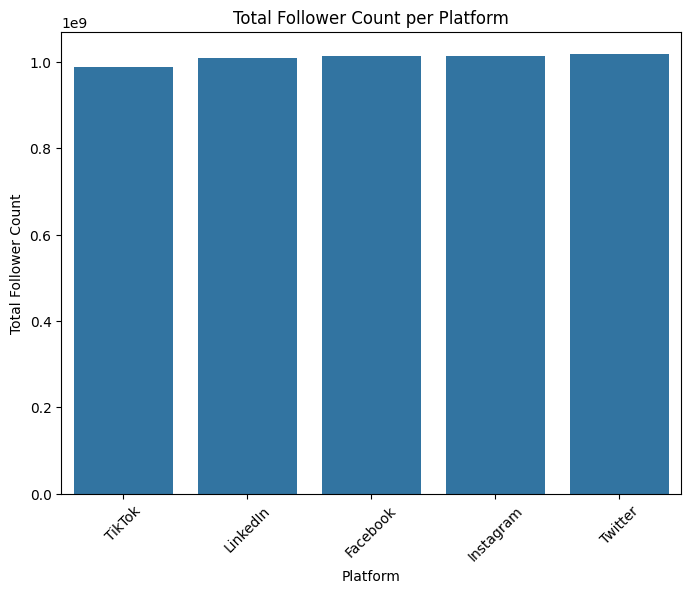

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Platform'], y=df['Follower Count'], estimator=sum, ci=None)
plt.title('Total Follower Count per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Follower Count')
plt.xticks(rotation=45)
plt.show()

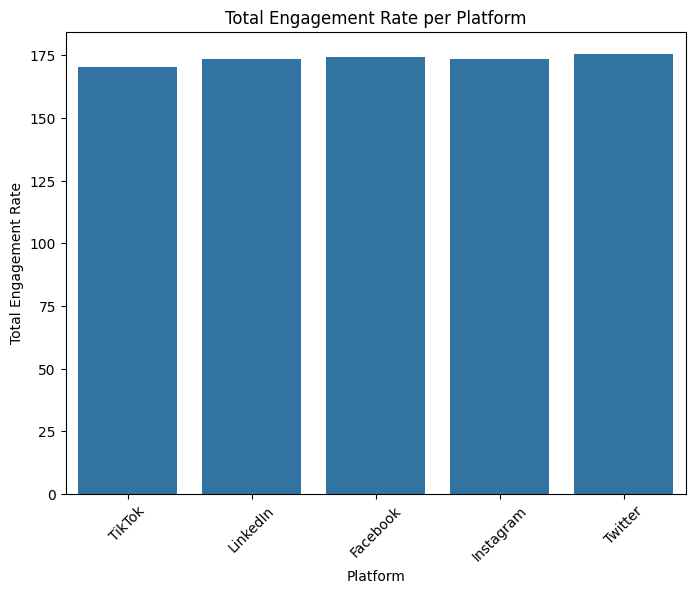

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Platform'], y=df['Engagement Rate'], estimator=sum, ci=None)
plt.title('Total Engagement Rate per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Engagement Rate')
plt.xticks(rotation=45)
plt.show()

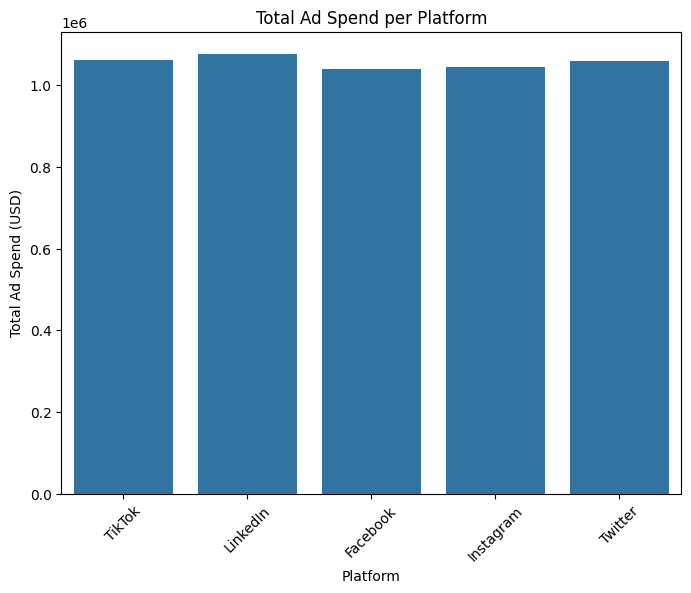

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Platform'], y=df['Ad Spend (USD)'], estimator=sum, ci=None)
plt.title('Total Ad Spend per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Ad Spend (USD)')
plt.xticks(rotation=45)
plt.show()

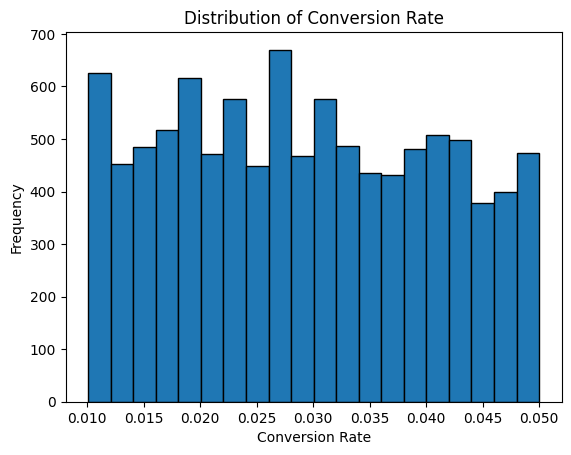

In [14]:
plt.hist(df['Conversion Rate'], bins=20, edgecolor='black')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Conversion Rate')
plt.show()

In [15]:
scaler = StandardScaler()


In [16]:
df[num_col] = scaler.fit_transform(df[num_col])

In [17]:
df.head()

,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
0,TikTok,-1.572384,-0.494840,0.890268,0.036984,1.728629,-1.699981
1,LinkedIn,1.690741,0.518242,-0.250362,-0.173176,-1.034186,-0.850446
2,Facebook,-0.996703,-0.494840,1.145409,-1.347443,0.224818,-1.010451
3,Instagram,-1.036694,1.024783,-0.250362,1.445618,0.941751,-0.937425
4,Facebook,-0.537517,-1.001380,-1.691158,-0.083199,1.492565,-0.795127


# Applying One Hot Encoder 

In [18]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity
encoded_features = encoder.fit_transform(df[['Platform']])

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Platform']))

# Concatenate with original DataFrame (excluding original 'Platform' column)
df = pd.concat([df.drop(columns=['Platform']), encoded_df], axis=1)

# Train Test Split

In [19]:
X = df.drop('Conversion Rate', axis=1)
y = df['Conversion Rate']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df.shape

(10000, 10)

In [22]:
X_train.shape

(8000, 9)

In [23]:
X_test.shape

(2000, 9)

In [24]:
y_train.shape

(8000,)

In [25]:
y_test.shape

(2000,)

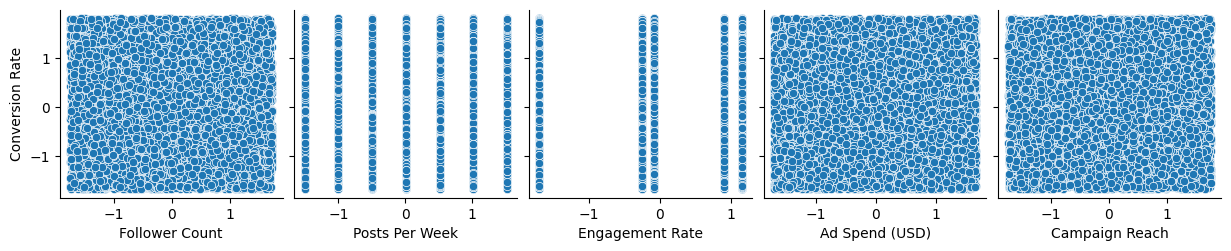

In [26]:
sns.pairplot(df, y_vars=['Conversion Rate'], x_vars=['Follower Count', 'Posts Per Week', 'Engagement Rate', 'Ad Spend (USD)', 'Campaign Reach'])
plt.show()

In [27]:
df.head()

,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Instagram,Platform_LinkedIn,Platform_TikTok,Platform_Twitter
0,-1.572384,-0.494840,0.890268,0.036984,1.728629,-1.699981,0.0,0.0,1.0,0.0
1,1.690741,0.518242,-0.250362,-0.173176,-1.034186,-0.850446,0.0,1.0,0.0,0.0
2,-0.996703,-0.494840,1.145409,-1.347443,0.224818,-1.010451,0.0,0.0,0.0,0.0
3,-1.036694,1.024783,-0.250362,1.445618,0.941751,-0.937425,1.0,0.0,0.0,0.0
4,-0.537517,-1.001380,-1.691158,-0.083199,1.492565,-0.795127,0.0,0.0,0.0,0.0


In [28]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [29]:
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [30]:
# mse

In [31]:
# mae

In [32]:
# r2

# Applying SVR

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = SVR(kernel='rbf', C=100, gamma=0.00001)
model1.fit(X_train_scaled, y_train)

SVR(C=100, gamma=1e-05)

In [34]:
y_pred1 = model1.predict(X_test_scaled)


In [35]:
mae1 = mean_absolute_error(y_test, y_pred1)

In [36]:
mse1 = mean_squared_error(y_test, y_pred1)

In [37]:
r2score = r2_score(y_test, y_pred1)

In [38]:
mae1

np.float64(0.8605314630514088)

In [39]:
mse1

np.float64(1.0067785508293408)

In [40]:
r2score

-0.005123276249998421

# Applying Grid Search CV for best Parameters 

In [41]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale'],
}


In [42]:
model2 = SVR(kernel='rbf')
grid_search = GridSearchCV(estimator = model2 , param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


In [43]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale']},
             scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.01}

# Applying best parameters according to Grid Search CV

In [46]:
model3 = SVR(kernel='rbf', C=0.1, gamma=0.01)
model3.fit(X_train_scaled, y_train)

SVR(C=0.1, gamma=0.01)

In [48]:
y_pred3 = model3.predict(X_test_scaled)


In [49]:
mae3 = mean_absolute_error(y_test, y_pred3)

In [50]:
mse3 = mean_squared_error(y_test, y_pred3)

In [51]:
r2score3 = r2_score(y_test, y_pred3)

In [52]:
mae3

np.float64(0.8608791040220098)

In [53]:
mse3

np.float64(1.0074368670969127)

In [54]:
r2score3

-0.005780510160201979